<a href="https://colab.research.google.com/github/bharath898/Stock-price-prediction/blob/main/stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [184]:
df = pd.read_csv("/content/Google.csv")

In [185]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...,...
1756,2021-12-22,2882.000000,2946.060059,2879.260010,2938.979980,2938.979980,921900
1757,2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690300
1758,2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
1759,2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


In [187]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,1220.630527,1232.290406,1209.582267,1221.454750,1221.454750,1.671220e+06
std,610.890123,616.593351,605.804613,611.531027,611.531027,8.150576e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,3.468000e+05
25%,774.250000,779.530029,768.794983,772.880005,772.880005,1.191400e+06
50%,1082.469971,1094.170044,1070.000000,1082.479980,1082.479980,1.466700e+06
75%,1390.800049,1411.579956,1377.151978,1393.339966,1393.339966,1.907200e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,1.116490e+07


In [188]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582


In [189]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1756,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False
1758,False,False,False,False,False,False,False
1759,False,False,False,False,False,False,False


In [190]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [191]:
df.dropna(inplace=True)

In [192]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...,...
1756,2021-12-22,2882.000000,2946.060059,2879.260010,2938.979980,2938.979980,921900
1757,2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690300
1758,2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
1759,2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200


In [193]:
if 'Date' in df.columns:
    df.drop('Date', axis=1, inplace=True)

In [194]:
df

,Open,High,Low,Close,Adj Close,Volume
0,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...
1756,2882.000000,2946.060059,2879.260010,2938.979980,2938.979980,921900
1757,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690300
1758,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
1759,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200


In [195]:
import seaborn as sns

<Axes: ylabel='High'>

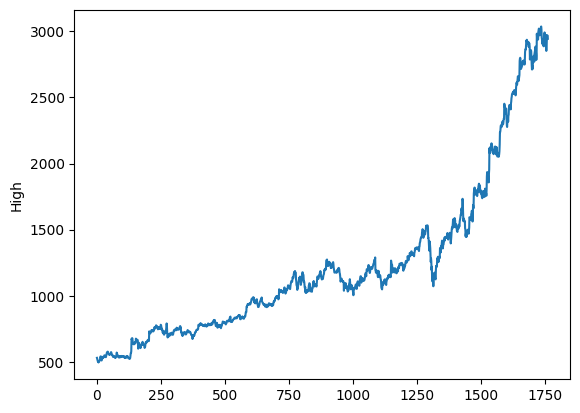

In [196]:
sns.lineplot(data=df['High'])

In [197]:
X = df.drop('High', axis=1)
y = df['High']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
model = LinearRegression()

In [200]:
model.fit(X_train, y_train)

LinearRegression()

In [201]:
y_pred = model.predict(X_test)

In [202]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [203]:
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6.804021154698923


In [204]:
new_data = pd.DataFrame({'Open': [1000, 2000, 1500],
                         'Low': [1.3, 1.7, 2.4],
                         'Close': [1.2, 1.8, 2.3],
                         'Adj Close': [1.5, 2.0, 2.5],
                         'Volume': [200, 300, 400]})

In [205]:
print(new_data.columns)

Index(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [206]:
print(model.feature_names_in_)

['Open' 'Low' 'Close' 'Adj Close' 'Volume']


In [207]:
predicted_price = model.predict(new_data)

In [208]:
print('Predicted Price:', predicted_price)

Predicted Price: [ 618.74514191 1245.14071994  932.20472604]
